# Q) 언제 지하철을 가장 많이 이용할까? 

In [2]:
# 필요한 라이브러리를 불러옵니다. 
import pandas as pd 

# 1. 준비한 자료 읽어오기

In [3]:
# 앞서 정리한 파일을 불러옵니다. 
raw = pd.read_excel('./data/subway_raw.xlsx')
raw.head()

In [4]:
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
사용일자      99342 non-null int64
요일        99342 non-null object
노선명       99342 non-null object
역ID       99342 non-null int64
역명        99342 non-null object
승차총승객수    99342 non-null int64
하차총승객수    99342 non-null int64
등록일자      99342 non-null int64
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


## Q)가장 승객이 많은 날짜?

In [6]:
# pivot_table을 이용해 사용일자/요일별 승차승객수 합계 데이터를 정리하겠습니다. 
data_date = pd.pivot_table(raw, index = ['사용일자', '요일'], values= '승차총승객수', aggfunc= 'sum')
data_date.head()

,,승차총승객수
사용일자,요일,
20190101,화,3419948
20190102,수,7621668
20190103,목,7873692
20190104,금,8270345
20190105,토,6062294


In [7]:
# sort_values()를 이용하여 승객수 기준으로 정렬하겠습니다. 
data_date.sort_values(by='승차총승객수')

,,승차총승객수
사용일자,요일,
20190205,화,2837335
20190204,월,2941955
20190203,일,3412440
20190101,화,3419948
20190206,수,3741895
...,...,...
20190412,금,9012472
20190517,금,9058227
20190524,금,9068976


In [8]:
# sort_values()를 이용하여 승객수 기준으로 정렬하겠습니다. 
# ascending = False 옵션을 이용하면 내림차순(큰 수부터 표시되도록)으로 정렬할 수 있습니다. 
data_date_sort = data_date.sort_values(by = '승차총승객수', ascending= False)
data_date_sort.head()

,,승차총승객수
사용일자,요일,
20190503,금,9229899
20190510,금,9164243
20190524,금,9068976
20190517,금,9058227
20190412,금,9012472


> ###  Q) 5월에 지하철 승객수가 많다?

> ### Q) 금요일에 지하철 승객수가 많다?

### 가정1)   5월에 승객수가 많다??  

#### 월별 승객수 비교 -> 필요한 컬럼 추가하기(연월)
현재 일자/요일 데이터만 존재하며, 월 데이터는 존재하지 않습니다.  일자  데이터에서 필요한 월 정보를 추출하겠습니다. 

In [9]:
# 연월일 데이터에서 연월/월일 데이터를 정리하겠습니다. 
yearmonth_list = []
monthday_list = []
for date in raw['사용일자']:
    yearmonth = str(date)[:6]   # 왼쪽부터 6자리 문자 선택
    yearmonth_list.append(yearmonth)
    monthday = str(date)[4:]    # 왼쪽에서 5번째 문자부터 끝까지 선택
    monthday_list.append(monthday)
    
# 연월/ 월일 컬럼 추가하기
raw['연월'] = yearmonth_list
raw['월일'] = monthday_list
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190101,화,경춘선,1323,가평,1520,1436,20190104,201901,0101
1,20190101,화,경춘선,1322,상천,275,114,20190104,201901,0101
2,20190101,화,경춘선,1321,청평,1509,1083,20190104,201901,0101
3,20190101,화,경춘선,1320,대성리,357,271,20190104,201901,0101
4,20190101,화,경춘선,1319,마석,1772,1963,20190104,201901,0101


In [11]:
# 월별 승객수를 정리하겠습니다. 
data_month = pd.pivot_table(raw, index = '연월', values = '승차총승객수', aggfunc='sum')
data_month = data_month.sort_values(by = '승차총승객수', ascending= False)
data_month.head()

,승차총승객수
연월,
201905,236267004
201901,221848014
201906,221547039
201904,218832085
201902,190335812


### 가정1)   5월에 승객수가 많다??    --> `True`

---

### 가정2)  금요일에 승객수가 많다?   

In [13]:
# 요일별 승객수를 정리하겠습니다. 
data_week = pd.pivot_table(raw, index = '요일', values = '승차총승객수', aggfunc='sum')
data_week.sort_values(by = '승차총승객수', ascending= False)
data_week

,승차총승객수
요일,
금,214064383
목,197522587
수,176959733
월,187921393
일,114626732
토,157401217
화,198116552


#### 월별로 편차가 존재할까??? --> 월별/일자별 승객수 그래프로 살펴보기

In [14]:
# 먼저, 1개월 데이터 선택하겠습니다. 
df_selected = raw[ raw['연월'] == '201901']
df_selected.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190101,화,경춘선,1323,가평,1520,1436,20190104,201901,0101
1,20190101,화,경춘선,1322,상천,275,114,20190104,201901,0101
2,20190101,화,경춘선,1321,청평,1509,1083,20190104,201901,0101
3,20190101,화,경춘선,1320,대성리,357,271,20190104,201901,0101
4,20190101,화,경춘선,1319,마석,1772,1963,20190104,201901,0101


In [16]:
# 1개월 데이터에서 일자/요일별 승객수 계 데이터를 정리합니다. 
df_pivot = pd.pivot_table(df_selected, index = ['월일','요일'], values = '승차총승객수', aggfunc= 'sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

,월일,요일,승차총승객수
0,0101,화,3419948
1,0102,수,7621668
2,0103,목,7873692
3,0104,금,8270345
4,0105,토,6062294


In [17]:
# 그래프 그리기에 필요한 라이브러리를 불러옵니다. 
# 한글을 표시하기 위해 폰트를 지정합니다. 
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import font_manager, rc
import platform 

# 한글 폰트 사용
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

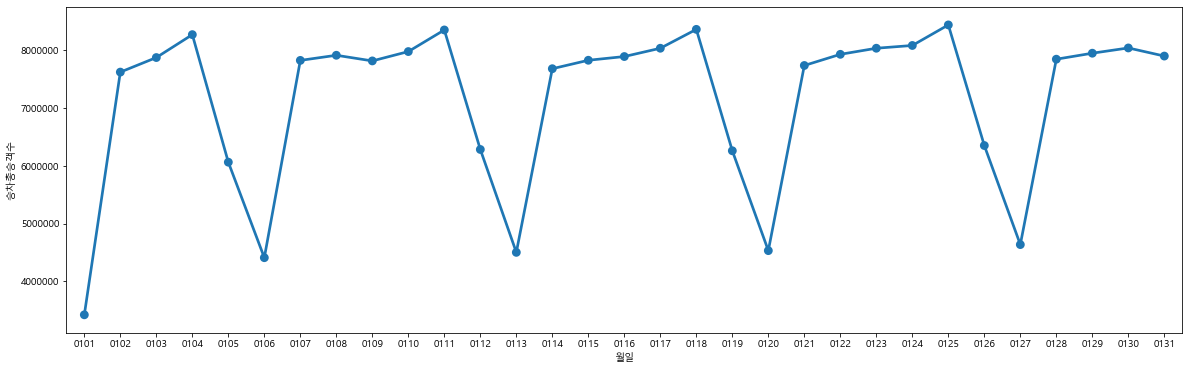

In [21]:
# 일자별 승객수를 그래프로 살펴보겠습니다. 

# 16x10 사이즈의 그래프 그리겠다는 의미입니다. 
fig, ax = plt.subplots( figsize=(20,6) )
# 그래프 그리기
sns.pointplot(data = df_pivot, x = '월일', y = '승차총승객수')

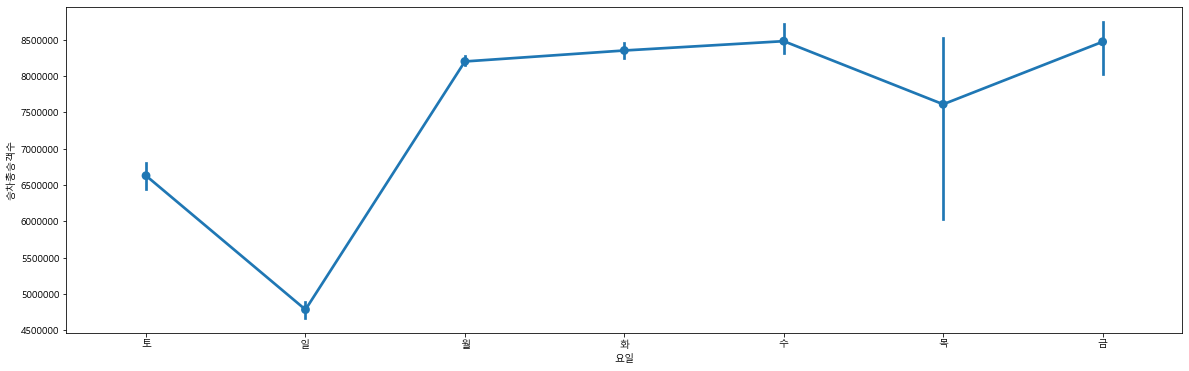

In [25]:
# 요일별 승객수를 그래프로 살펴보겠습니다. 

# 16x10 사이즈의 그래프 그리겠다는 의미입니다. 
fig, ax = plt.subplots( figsize=(20,6) )
# 그래프 그리기
sns.pointplot(data = df_pivot, x = '요일', y = '승차총승객수')

### 월별 일자별그래프 그리기

In [22]:
# raw['연월']에 있는 값의 종류를 살펴보겠습니다. 
raw['연월'].unique()

array(['201901', '201902', '201903', '201904', '201905', '201906'],
      dtype=object)

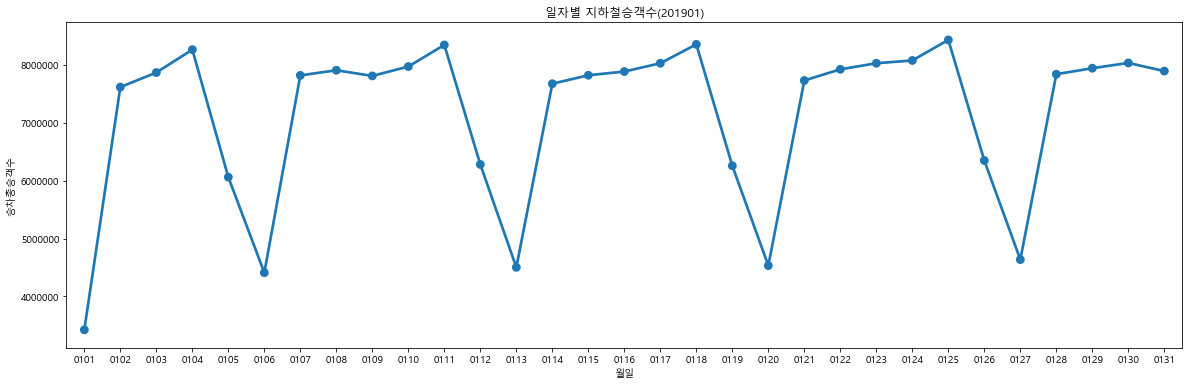

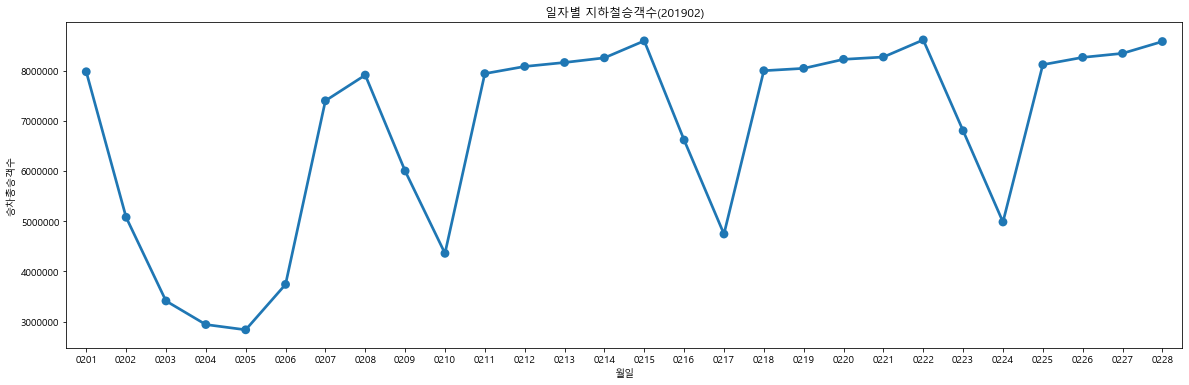

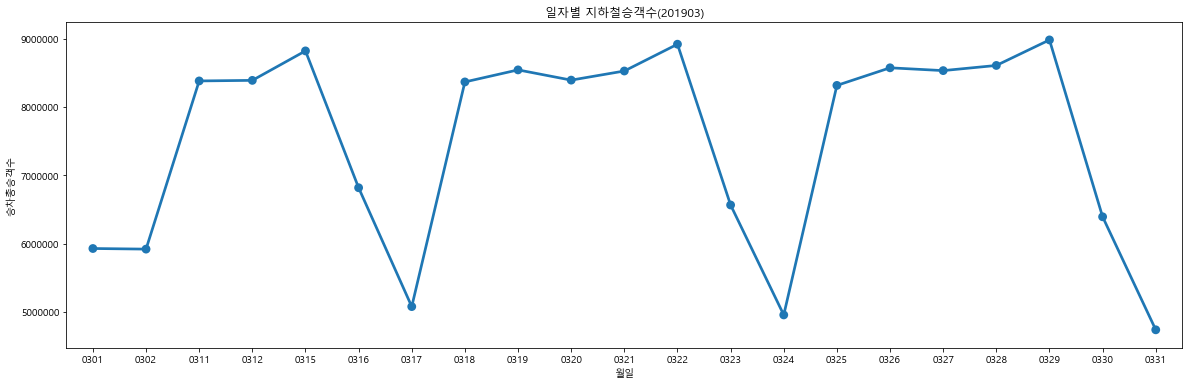

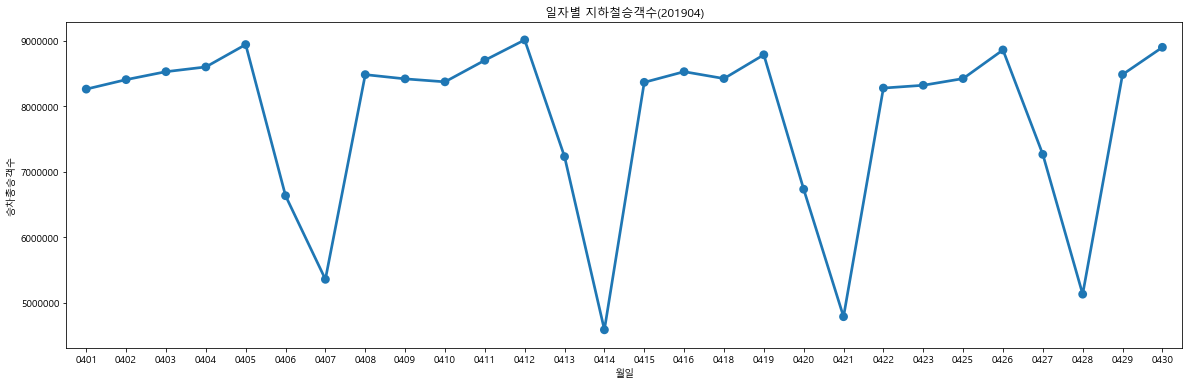

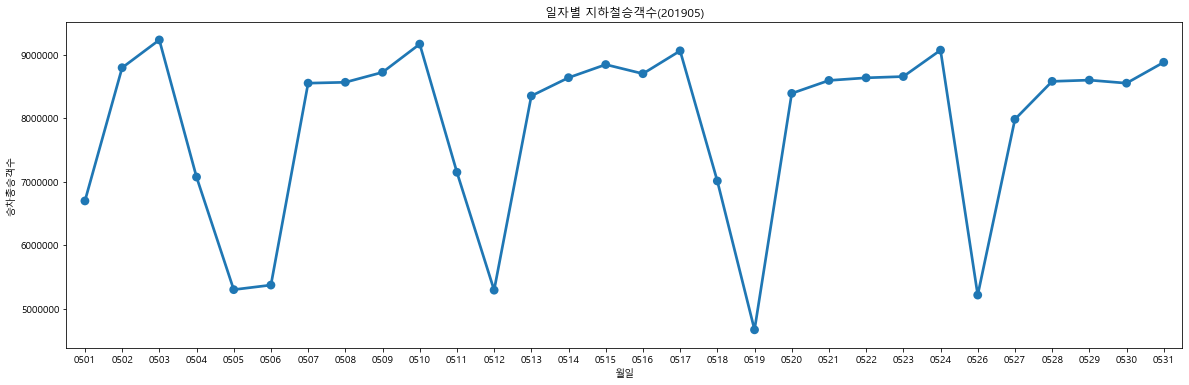

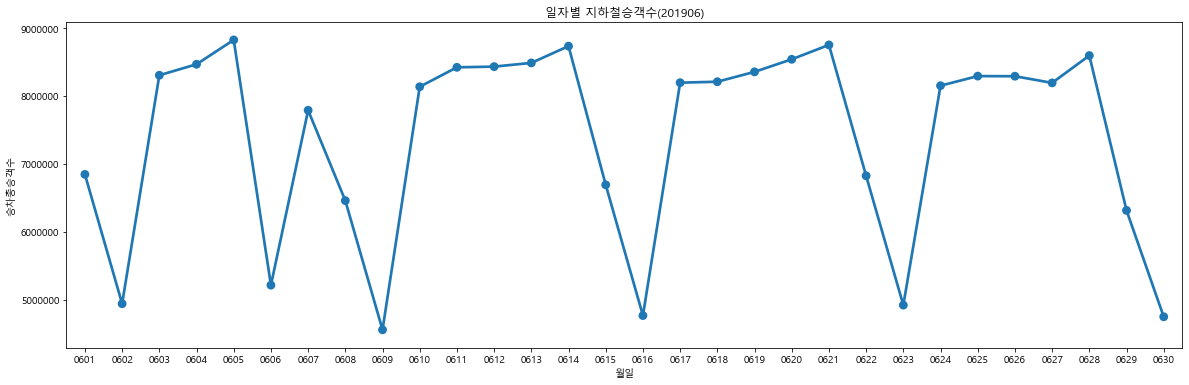

In [26]:
# 반복문을 이용해, 모든 월에 대한 그래프를 그려보겠습니다. 
# 월별 그래프 그리기
for yearmonth in raw['연월'].unique():
    df_selected = raw[ raw['연월'] == yearmonth]  # 해당 연월 데이터 선택하기
    df_pivot = pd.pivot_table(df_selected, index = ['월일','요일'], values = '승차총승객수', aggfunc= 'sum')# 일자별 승객수 계
    df_pivot = df_pivot.reset_index()
    
    fig, ax = plt.subplots( figsize=(20,6) )
    
    ax.set_title(f'일자별 지하철승객수({yearmonth})')  # 그래프 제목 추가하기
    sns.pointplot(data = df_pivot, x = '월일', y = '승차총승객수')